In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [6]:
os.chdir(r"C:\Users\91808\Downloads\End_to_End_ML_Project2\artifacts")

In [8]:
pwd

'C:\\Users\\91808\\Downloads\\End_to_End_ML_Project2\\artifacts'

In [31]:
data_path=r"C:\Users\91808\Downloads\End_to_End_ML_Project2\artifacts\02_22_2024_23_04_26\data_ingestion\data"
data_path

'C:\\Users\\91808\\Downloads\\End_to_End_ML_Project2\\artifacts\\02_22_2024_23_04_26\\data_ingestion\\data'

In [32]:
class_name=["ringworm","measles"]


# Creating a function to  get the list of files
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list the files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list


In [33]:
data_path+'/train/'+class_name[0]


'C:\\Users\\91808\\Downloads\\End_to_End_ML_Project2\\artifacts\\02_22_2024_23_04_26\\data_ingestion\\data/train/ringworm'

In [ ]:
'C:\\Users\\91808\\Downloads\\End_to_End_ML_Project2\\artifacts\\02_22_2024_23_04_26\\
data_ingestion\\data'


In [39]:
files_list_ringworm_train = get_list_of_files(data_path+'/train/'+class_name[0])
files_list_measles__train = get_list_of_files(data_path+'/train/'+class_name[1])


In [40]:
files_list_ringworm_test = get_list_of_files(data_path+'/test/'+class_name[0])
files_list_measles__test = get_list_of_files(data_path+'/test/'+class_name[1])


In [41]:
print("Number of train samples in ringworm category {}".format(len(files_list_ringworm_train)))
print("Number of train samples in measles category {}".format(len(files_list_measles__train)))
print("Number of test samples in ringworm category {}".format(len(files_list_ringworm_test)))
print("Number of test samples in measles category {}".format(len(files_list_measles__test)))

Number of train samples in ringworm category 214
Number of train samples in measles category 298
Number of test samples in ringworm category 62
Number of test samples in measles category 66


In [42]:
rand_img_no = np.random.randint(0,len(files_list_ringworm_train))
rand_img_no


178

(400, 400, 3)


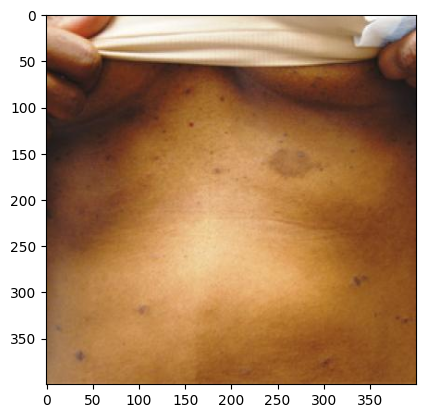

In [43]:
img = data_path + '/train/ringworm/'+ files_list_normal_train[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [44]:
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [45]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [46]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)
train_data

Dataset ImageFolder
    Number of datapoints: 512
    Root location: C:\Users\91808\Downloads\End_to_End_ML_Project2\artifacts\02_22_2024_23_04_26\data_ingestion\data\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ColorJitter(brightness=(0.9, 1.1), contrast=(0.9, 1.1), saturation=(0.9, 1.1), hue=(-0.1, 0.1))
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [47]:
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)
test_data

Dataset ImageFolder
    Number of datapoints: 128
    Root location: C:\Users\91808\Downloads\End_to_End_ML_Project2\artifacts\02_22_2024_23_04_26\data_ingestion\data\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [48]:
train_loader = DataLoader(train_data,
                          batch_size= 2, shuffle= True, pin_memory= True)

In [49]:
test_loader = DataLoader(test_data,
                         batch_size= 2, shuffle= False, pin_memory= True)

In [50]:
class_names = train_data.classes
print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['measles', 'ringworm']
Number of train images: 512
Number of test images: 128
